# NORTHEAST REGION REAL ESTATE DATA



# Table of contents


>[Introduction](#scrollTo=tMzSlAezDIBA)

>[Terms of Service](#scrollTo=YdroU6m2FWC6)

>[Methodology](#scrollTo=OFUWksaqGdMR)

>[Libraries in Use](#scrollTo=srSG9iI3GU6v)

>[Data Acquisition](#scrollTo=5R1PYAciGsxy)

>[Generating Outputs](#scrollTo=Ih9J7nCPHK7A)

>[Data Manipulation](#scrollTo=sEHJH030G-UT)





# Introduction

This project is collects and cleans the current housing market data and trends across the Northeast Regional states of the United States. These states include: New Jersey, New York, New Hampshire, Connecticut, District of Columbia, Massachusetts, Maine, Pennsylvania, Rhode Island, Maryland, Delaware, Vermont, Virginia, West Virginia. The data is focused on active house listings that have been listed. The data is being created by extracting publicly available listings from ForSaleByOwners website. ForSaleByOwners website is an online real estate market website that offers easy access tools for agents and clients to buy, sell or rent properties. It aims to focus on identifying influencing factors on home listings within different states in the Northeast regions.

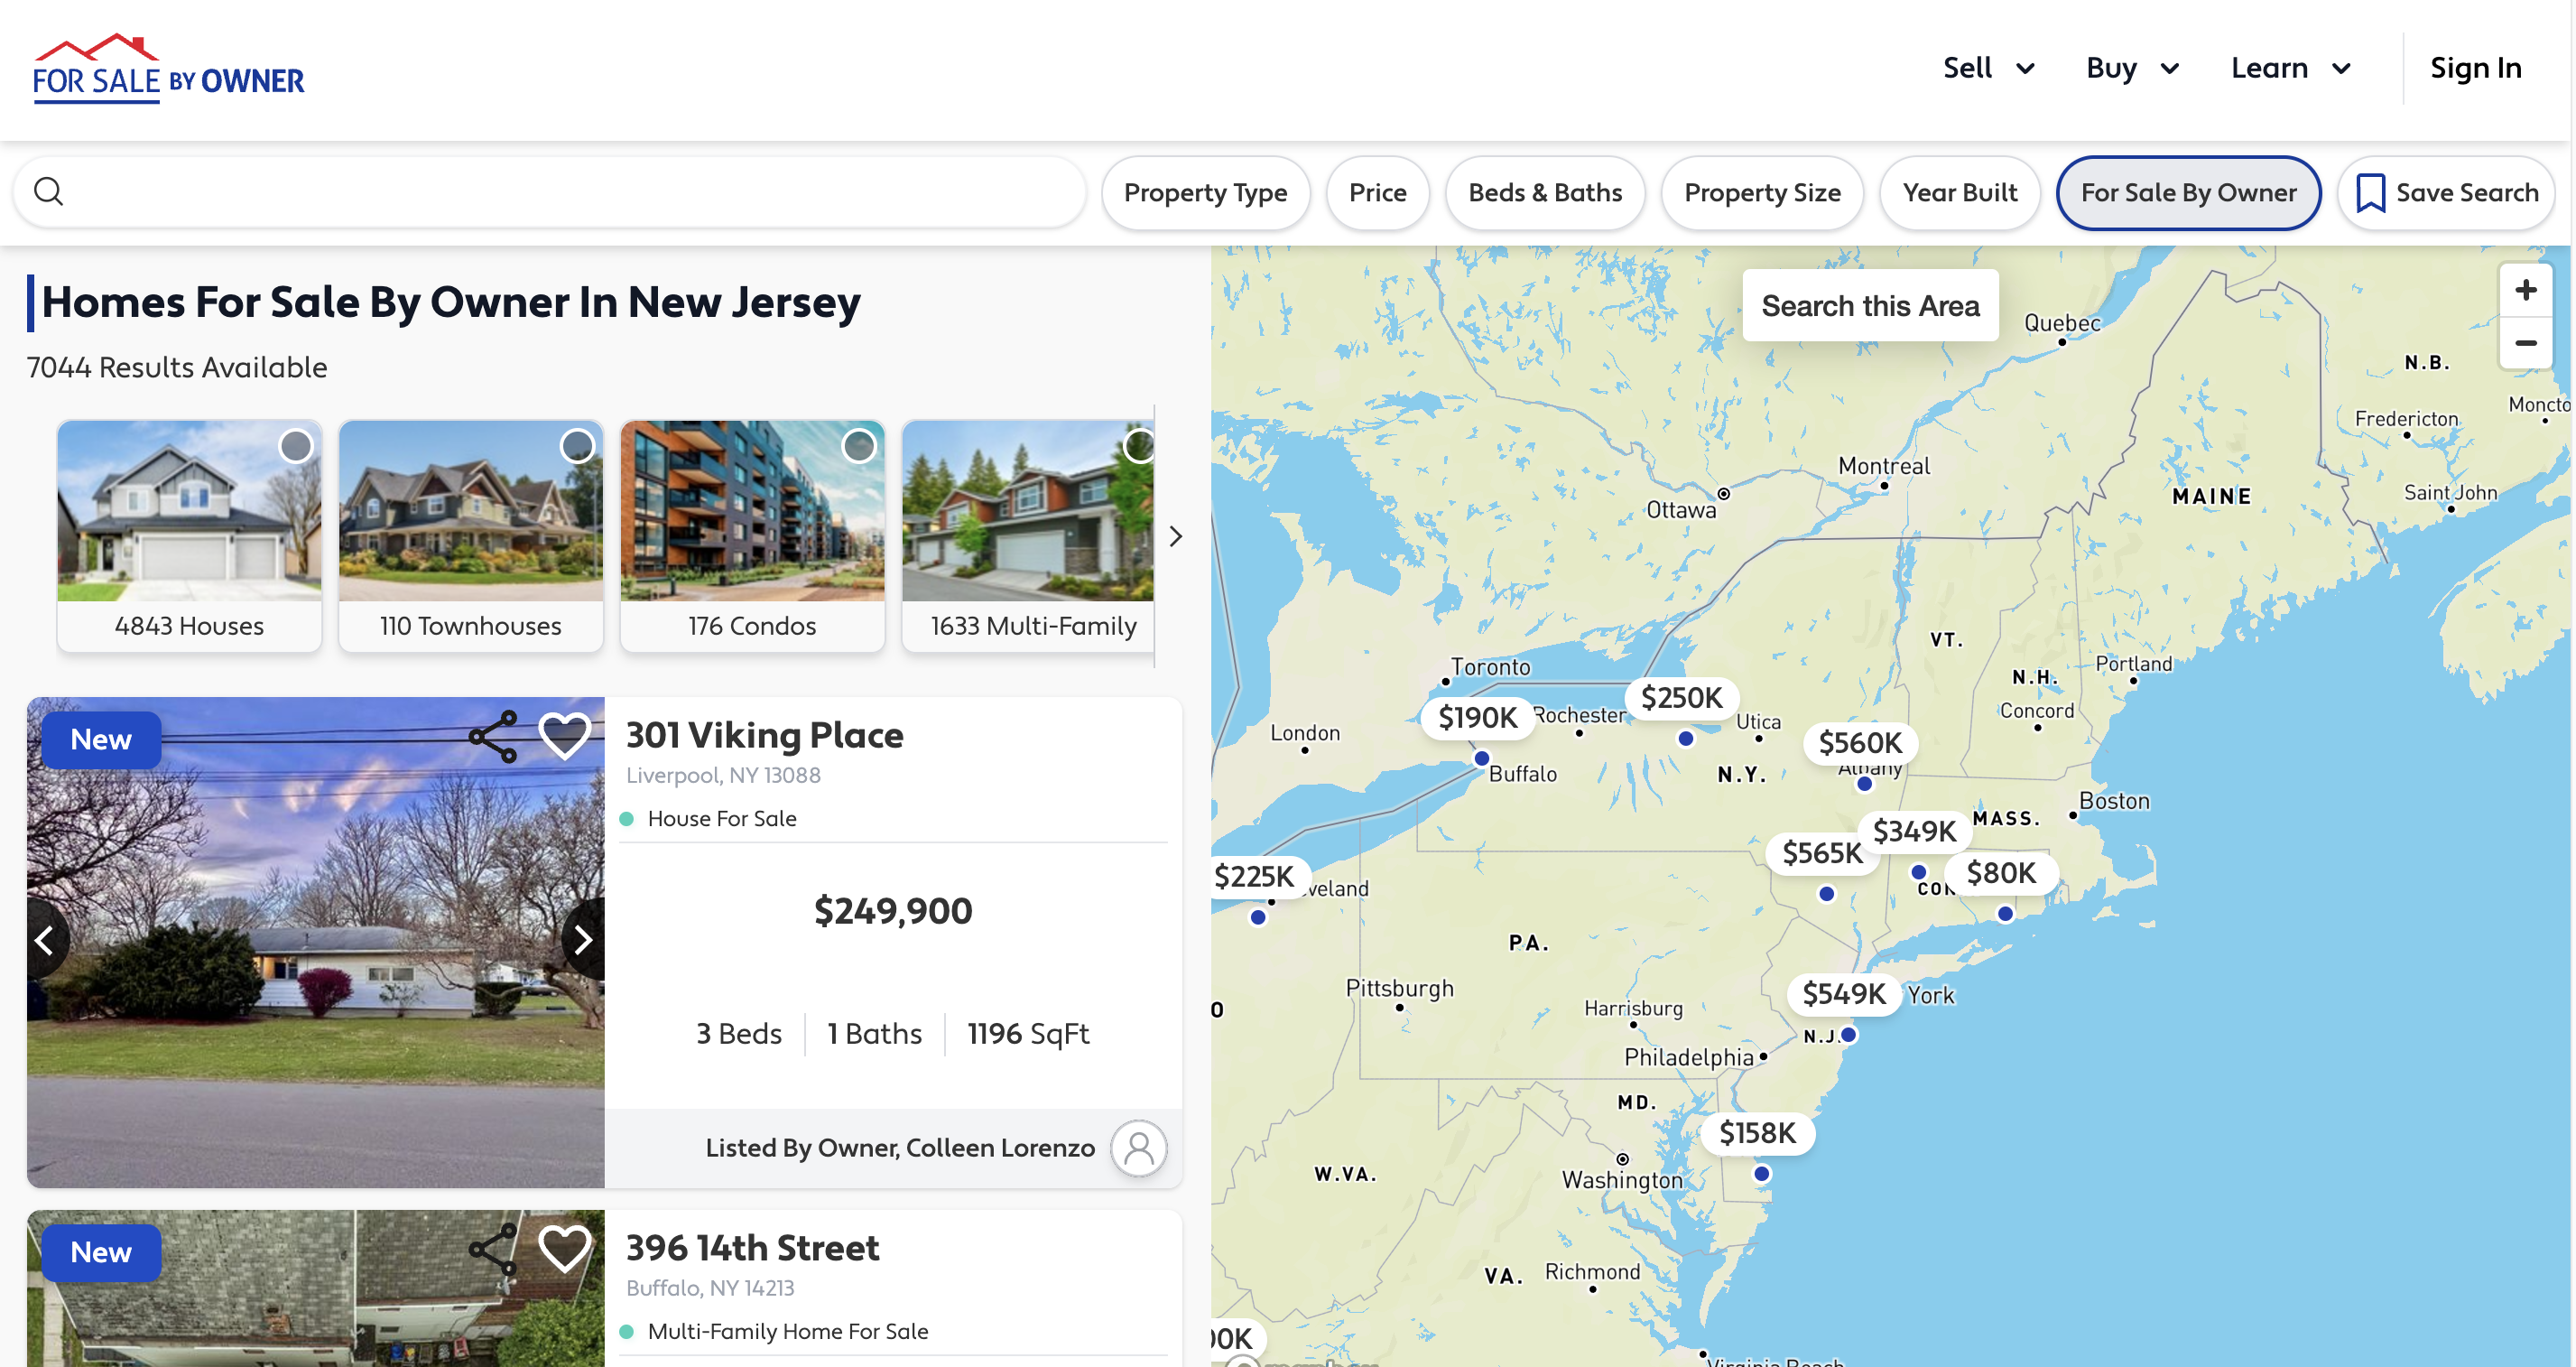

# Terms of Service

The dataset utilized in this project is being extracted from ForSaleByOwner and includes real estate information that is publicly accessible to users. The project is committed to adhering to ethical and legal standards when extracting and using this data. To ensure compliance, we will only collect information that is freely available to the public and avoid accessing or utilizing any proprietary, restricted, or confidential data that is intended for authorized users only.

As part of our data handling process, the collected information will be carefully cleaned and organized to improve its usability for analysis. This includes removing any irrelevant or sensitive content while ensuring that the dataset retains its integrity and value for research purposes.

Once the data has been processed, we will make the cleaned dataset available through a public repository. This approach promotes transparency and encourages further exploration, research, and analysis by other users. Proper attribution will be provided to ForSaleByOwner as the original source of the data, acknowledging their role in making the information available to the public.

By adhering to these practices, we aim to foster ethical use of publicly available data while supporting the advancement of real estate research and market trend analysis in an open and collaborative environment

# Methodology

Our approach to collecting and analyzing data involved exploring different methods to ensure comprehensive coverage of New Jersey's housing market trends. Here’s a detailed account of the steps we followed and the adjustments made along the way:  

1. **Initial Attempt: Beautiful Soup**  
   - We began our data extraction process using **Beautiful Soup**, a Python library for web scraping.  
   - While Beautiful Soup is efficient for parsing HTML and XML documents, it proved inadequate for this project because many real estate websites, including Zillow, dynamically load content using JavaScript.  
   - As a result, Beautiful Soup was unable to access complete datasets, limiting our ability to retrieve the required information like property prices, highlights, or detailed listings.  

2. **Transition to Selenium**  
   - To address the challenges with dynamic content, we adopted **Selenium**, a browser automation tool that can interact with web pages in real-time.  
   - Selenium allowed us to render JavaScript-heavy websites and extract data from dynamic elements such as dropdown menus, pagination, and pop-ups.  
   - By simulating user interactions, such as scrolling or clicking "load more" buttons, Selenium enabled us to collect a more comprehensive and accurate dataset.  

3. **Challenges and Solutions**    
   - **Data Formatting and Cleaning:** Extracted data often required extensive cleaning and formatting. We standardized elements such as title, location names, price formats, sellers info and date fields to ensure consistency in analysis.  
   - **Data Storage:** To manage the large volume of data, we used efficient storage solutions like CSV files and databases, ensuring scalability and easy retrieval.  

4. **Model Development and Evaluation**  
   - Once the data was collected, it underwent preprocessing, including handling missing values, encoding categorical data, and feature engineering.  
   - The cleaned data served as input for our machine learning model, which we used to predict property prices and analyze trends.  

By iteratively refining our methodology and leveraging the strengths of tools like Selenium, we successfully created a robust dataset that forms the backbone of our analysis. This approach ensures that our findings are based on reliable and comprehensive data, enabling actionable insights into New Jersey's real estate market.  

# Libraries in Use

In [ ]:
#Installing Selenium and chrome driver
!pip install selenium
!apt-get update
!apt-get install -y chromium-browser
!apt install chromium-chromedriver

#Setting up a Chrome browser that can be used to automate web interactions, such as clicking buttons, filling forms, and scraping data from websites.
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, ElementClickInterceptedException, NoSuchElementException
import time
import csv

!ls /usr/lib/chromium-browser/chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 34.0 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,560 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,234 kB]
Get:11 http://security.ubuntu.com/u

# Data Acquisition

In [ ]:
# The main code for scraping and aquiring the listings from www.forsalebyowner.com
driver = web_driver()

#url
driver.get('https://www.forsalebyowner.com/search/list/Delaware/for_sale-status')

# Wait for the page to load
time.sleep(5)

scraped_results = []

# Function to close modals (if any)
def close_modals():
    try:
        modal_close_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "modal-close-button-class")))
        modal_close_button.click()
        print("Modal closed")
    except TimeoutException:
        print("No modal or close button found")

# Function to click the "View More Listings" button
def click_view_more():
    try:
        view_more_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//*[text()="View More Listings"]')))
        view_more_button.click()
        print("View More Listings button clicked")
        return True
    except ElementClickInterceptedException:
        print("Element click intercepted, trying to wait for modal to disappear")
        try:
            WebDriverWait(driver, 10).until(
                EC.invisibility_of_element_located((By.CLASS_NAME, "modal-class-name")))
            view_more_button.click()
            print("View More Listings button clicked after modal disappeared")
            return True
        except TimeoutException:
            print("Failed to wait for modal to disappear")
            return False
    except TimeoutException:
        print("View More Listings button not clickable")
        return False

#Function to collect the data listing from website
def extract_listings():
    listings = []
    try:
        body = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="app"]/div/div[1]/div/div/div[3]/div[1]/div[2]')))

        print("Body element found.")

        property_elements = body.find_elements(By.XPATH, './/div[contains(@class, "flex flex-col items-center md:h-70 md:w-1/2 relative")]')

        print(f"Found {len(property_elements)} property elements.")

        if len(property_elements) == 0:
            print("No property elements found. Please verify the XPath.")

        for idx, property_element in enumerate(property_elements):
            try:
                # Extract property title and location
                title = property_element.find_element(By.XPATH, './/a[contains(@class, "block text-xl font-bold")]').text
                location = property_element.find_element(By.XPATH, './/a[contains(@class, "block text-xl font-bold")]/span').text
                # Extract price
                price = property_element.find_element(By.XPATH, './/span[contains(@class, "text-xl")]').text
                # Extract property details (e.g., Beds, Baths, Acres)
                details = property_element.find_element(By.XPATH, './/div[contains(@class, "flex items-center pb-1 text-center")]').text
                # Extract seller information (optional)
                seller_info = property_element.find_element(By.XPATH, './/div[contains(@class, "mr-2 text-right")]').text

                # Add the data to the listings list
                listings.append({
                    "Title": title,
                    "Location": location,
                    "Price": price,
                    "Details": details,
                    "Seller Info": seller_info,
                })
            except NoSuchElementException as e:
                # If an element is missing, let's print the HTML of the property element to debug
                print(f"Error for property {idx + 1}: {e}")
                print("Property HTML: ", property_element.get_attribute('outerHTML'))
    except Exception as e:
        print(f"Error extracting listings: {e}")
    return listings

# Function to save the data to a CSV file
def save_to_csv(listings, filename="Delaware.csv"):
    keys = listings[0].keys()
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=keys)
        writer.writeheader()
        for listing in listings:
            writer.writerow(listing)
    print(f"Data saved to {filename}")


# Main function to scrape all listings (including "View More Listings")
def scrape_all_listings(max_lookups=1500, target_listings=2500):
    all_listings = []
    last_listing_count = 0
    lookup_count = 0

    while True:
        if lookup_count >= max_lookups:
            print("Reached maximum lookup count. Stopping.")
            break

        listings = extract_listings()

        # Check if there are any new listings
        if len(listings) == 0:
            print("No new listings found.")
            break

        # Append unique listings only (check for duplicates based on a unique key, e.g., title + location)
        for listing in listings:
            if listing not in all_listings:
                all_listings.append(listing)

        print(f"Total listings found so far: {len(all_listings)}")

        # Stop if we have reached the target number of listings
        if len(all_listings) >= target_listings:
            print(f"Reached the target number of {target_listings} listings. Stopping.")
            break

        # Check if the number of listings has increased, if not, break the loop
        if len(all_listings) == last_listing_count:
            print("No new listings found. Ending the scraping process.")
            break

        last_listing_count = len(all_listings)

        # Try to load more listings
        more_loaded = click_view_more()
        if not more_loaded:
            print("No more listings to load.")
            break

        lookup_count += 1
        time.sleep(10)  # Add a delay to reduce the load on the website

    return all_listings


# Run the scraping process
try:
    all_listings = scrape_all_listings()
    print(f"Scraping complete. Found {len(all_listings)} listings.")

    if all_listings:
        save_to_csv(all_listings)

    for listing in all_listings:
        print(listing)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    driver.quit()

Body element found.
Found 20 property elements.
Total listings found so far: 20
View More Listings button clicked
Body element found.
Found 40 property elements.
Total listings found so far: 38
View More Listings button clicked
Body element found.
Found 60 property elements.
Total listings found so far: 58
View More Listings button clicked
Body element found.
Found 80 property elements.
Total listings found so far: 78
View More Listings button clicked
Body element found.
Found 100 property elements.
Total listings found so far: 98
View More Listings button clicked
Body element found.
Found 120 property elements.
Total listings found so far: 118
View More Listings button clicked
Body element found.
Found 140 property elements.
Total listings found so far: 138
View More Listings button clicked
Body element found.
Found 160 property elements.
Total listings found so far: 158
View More Listings button clicked
Body element found.
Found 180 property elements.
Total listings found so far: 178

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


def save_to_csv(listings, filename="Connecticuts.csv"):
    # Ensure the folder exists in Google Drive
    folder_path = '/content/drive/MyDrive/MyDSCIListings'
    file_path = f"{folder_path}/{filename}"  # Full path including the filename

    import os
    os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

    try:
        keys = listings[0].keys()  # Use the keys of the first listing as the CSV header
        with open(file_path, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=keys)
            writer.writeheader()
            for listing in listings:
                writer.writerow(listing)
        print(f"Data saved to {file_path}")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")



In [ ]:
from google.colab import files
files.download("Connecticut.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Generating Outputs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import csv

def merge_data(filenames):
    dataframes = []
    for filename in filenames:
        df = pd.read_csv(filename, header = [0])
        dataframes.append(df)
    merged_df = pd.concat(dataframes, ignore_index=True)
    return merged_df

def save_dataframe_to_csv(dataframe, filename, index=False):
    try:
        dataframe.to_csv(filename, index=index)
        print(f"DataFrame successfully saved to '{filename}'")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame: {e}")
filenames = ['/content/drive/MyDrive/DSCI_511_Project/data/Connecticut.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Delaware.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/District_of_Colombia.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Maine.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Maryland.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Massachusetts.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/New_Jersey.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/New_York.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Pennsylvania.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Rhode_Island.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Vermont.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/Virginia.csv',
             '/content/drive/MyDrive/DSCI_511_Project/data/West_Virginia.csv',
             ]
real_estate_df = merge_data(filenames)
real_estate_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Title,Location,Price,Details,Seller Info,Image URL
0,"472 Cook Avenue\nMeriden, CT 06451","Meriden, CT 06451","$324,900",3 Beds\n2 Baths\n1200 SqFt,"Listed By Owner, Pedro Barbosa",NaN
1,"15 Bell Court\nEast Hartford, CT 06108","East Hartford, CT 06108","$124,999",2 Beds\n1 Baths\n890 SqFt,"Listed By Owner, Sal Salam",NaN
2,"202 Wyndemere Court\nSouth Windsor, CT 06074","South Windsor, CT 06074","$310,000",2 Beds\n2 Baths\n1102 SqFt,"Listed By Owner, Beautiful 2-bedroom condo for...",NaN
3,"51 Milton Avenue\nWaterbury, CT 06706","Waterbury, CT 06706","$354,900",4 Beds\n2 Baths\n1762 SqFt,"Listed By Owner, Yadram Shiwbodh",NaN
4,"37 Milwaukee Avenue\nBethel, CT 06801","Bethel, CT 06801","$514,999",3 Beds\n1.5 Baths\n1618 SqFt,"Listed By Owner, george arcamone",NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Data Manipulation




In [ ]:
#Add a "Square Footage" column
real_estate_df['Square Footage'] = 0
SquareFootage_column = real_estate_df.pop('Square Footage')
real_estate_df.insert(4, 'Square Footage', SquareFootage_column)

# Refine the Details Column:
real_estate_df['Details'] = real_estate_df['Details'].str.replace('\n', ' ')

# Put "," after "Baths"
real_estate_df['Details'] = real_estate_df['Details'].str.replace('Baths', 'Baths,')

# Move the SqFt info to the respective column
real_estate_df['Square Footage'] = real_estate_df['Details'].str.split(',').str[1]
real_estate_df['Details'] = real_estate_df['Details'].str.split(',').str[0]

# Remove column "Image URL" (if applicable)
real_estate_df.drop(real_estate_df.columns[real_estate_df.columns.str.strip() == 'Image URL'], axis=1, inplace=True)

# Extract address information
real_estate_df[['Street', 'City', 'State', 'Zipcodes']] = real_estate_df['Title'].str.extract(
    r'^(.*)\n(.*), (\w{2}) (\d{5})$'
)

# Drop the original 'Title' column if no longer needed
real_estate_df = real_estate_df.drop(columns=['Title'])

# Drop 'Location' column if no longer needed
real_estate_df = real_estate_df.drop(columns=['Location'])

# Reorder columns
columns_order = ['Street', 'City', 'State', 'Zipcodes'] + [col for col in real_estate_df.columns if col not in ['Street', 'City', 'State', 'Zipcodes']]
real_estate_df = real_estate_df[columns_order]

# Remove data where seller info is actually the address or description instead of an actual name
# Replace those instances with "Unknown" under seller info column
# Ex. in the New Hampshire sheet, rows 9,10 and 14 contain addresses instead of the seller name, so I've switched those to Unknown
real_estate_df['Seller Info'] = real_estate_df['Seller Info'].str.replace('Listed By Owner, ', '', regex=False)
invalid_seller_info = real_estate_df['Seller Info'].str.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9')) | \
                      real_estate_df['Seller Info'].str.contains('Street|Road|Avenue', case=False, regex=True) | \
                      real_estate_df['Seller Info'].isin(real_estate_df['Street']) | \
                      real_estate_df['Seller Info'].isin(real_estate_df['Details'])

real_estate_df.loc[invalid_seller_info, 'Seller Info'] = 'Unknown'

# Switch 0 Beds and 0 Baths to Land. Since there's no details and the total area is in acres, it looks like that is just land available for sale
# since that is one of our subtypes
type_land = real_estate_df['Details'].str.contains('0 Beds 0 Baths', case=False, regex=True)
real_estate_df.loc[type_land, 'Details'] = 'Land available'

real_estate_df.head(25)


,Street,City,State,Zipcodes,Price,Details,Square Footage,Seller Info
0,472 Cook Avenue,Meriden,CT,06451,"$324,900",3 Beds 2 Baths,1200 SqFt,Pedro Barbosa
1,15 Bell Court,East Hartford,CT,06108,"$124,999",2 Beds 1 Baths,890 SqFt,Sal Salam
2,202 Wyndemere Court,South Windsor,CT,06074,"$310,000",2 Beds 2 Baths,1102 SqFt,Beautiful 2-bedroom condo for sale
3,51 Milton Avenue,Waterbury,CT,06706,"$354,900",4 Beds 2 Baths,1762 SqFt,Yadram Shiwbodh
4,37 Milwaukee Avenue,Bethel,CT,06801,"$514,999",3 Beds 1.5 Baths,1618 SqFt,george arcamone
5,5 Jennifer Lynn Drive,Milldale,CT,06467,"$400,000",3 Beds 2 Baths,1156 SqFt,Jeff Spray
6,69 Sherwood Lane,Norwich,CT,06360,"$485,000",4 Beds 3 Baths,2491 SqFt,David Whelan
7,64 Wilson Street,Hartford,CT,06106,"$280,600",3 Beds 2 Baths,1529 SqFt,Adam McBrayer
8,100 Mount Pleasant Street,Derby,CT,06418,"$379,900",7 Beds 3.5 Baths,2027 SqFt,Jim M
9,251 Providence Street,Putnam,CT,06260,"$549,900",12 Beds 4 Baths,4361 SqFt,Bedward Ortiz


In [ ]:
def save_dataframe_to_csv(dataframe, filename, index=False):
    try:
        dataframe.to_csv(filename, index=index)
        print(f"DataFrame successfully saved to '{filename}'")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame: {e}")
save_dataframe_to_csv(real_estate_df, '/content/drive/MyDrive/DSCI_511_Project/data/Norteastern_Real_Estate.csv')

DataFrame successfully saved to '/content/drive/MyDrive/DSCI_511_Project/data/Norteastern_Real_Estate.csv'
